# PROYECTO DE ESTRUCTURAS DE DATOS 2

In [46]:
# Importando algunas librerías que utilizaremos
#CHACON VIDAL CARLA NICOL
#218011733
# Networkx para grafos
import networkx as nx

# Pandas
import pandas as pd

# Mathplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)


<h1><p style="color:orchid";>VUELOS NACIONALES E INTERNACIONALES</p><h1>

In [47]:
iata_bolivia = pd.read_csv('iata_bolivia.csv')
iata_bolivia.head(10)

,code,ubicacion,nombre_del_aeropuerto
0,VVI,Santa Cruz,Aeropuerto Viru Viru
1,LPB,La Paz,Aeropuerto El Alto
2,CBB,Cochabamba,Aeropuerto Jorge Wilsterman
3,TJA,Tarija,Aerpuerto Capitan Oriel Lea Plaza
4,LIM,LIMA,Aeropuerto Jorge Chavez
5,CIJ,Cobija,Aeropuerto Capitan Anibal Arab
6,MAD,Madrid,Aeropuerto Adolfo Suárez Madrid Barajas
7,MIA,Miami,Aeropuerto de Miami
8,GRU,Sao Paulo,Aeropuerto de Sao Paulo Guarulhos
9,EZE,Buenos Aires,Aeropuerto Buenos Aires Ezeiza


In [48]:
iata_bolivia.set_index(["code"], inplace=True)
iata_bolivia.head(10)
iata_bolivia.loc["VVI"]

ubicacion                          Santa Cruz
nombre_del_aeropuerto    Aeropuerto Viru Viru
Name: VVI, dtype: object

<h1><p style="color:orchid";>ORIGEN, DESTINO, TIEMPO (MINUTOS), PRECIO(BS)</p></h1>
<h1><p style="color:orchid";>TABLA DE DATOS</p></h1>

In [49]:
bolivia_flights = pd.read_csv("sample_bolivia_flights.csv")
bolivia_flights.head(55)

,origin,destino,tiempo,precio
0,VVI,LPB,65,246.00
1,VVI,TJA,295,392.00
2,VVI,CBB,45,307.00
3,VVI,CIJ,100,648.00
4,GRU,VVI,110,1416.61
5,VVI,EZE,260,1720.67
6,GRU,LPB,255,2100.73
7,MAD,GRU,1535,4940.87
8,MIA,GRU,1745,7566.78
9,GRU,LIM,380,2245.85


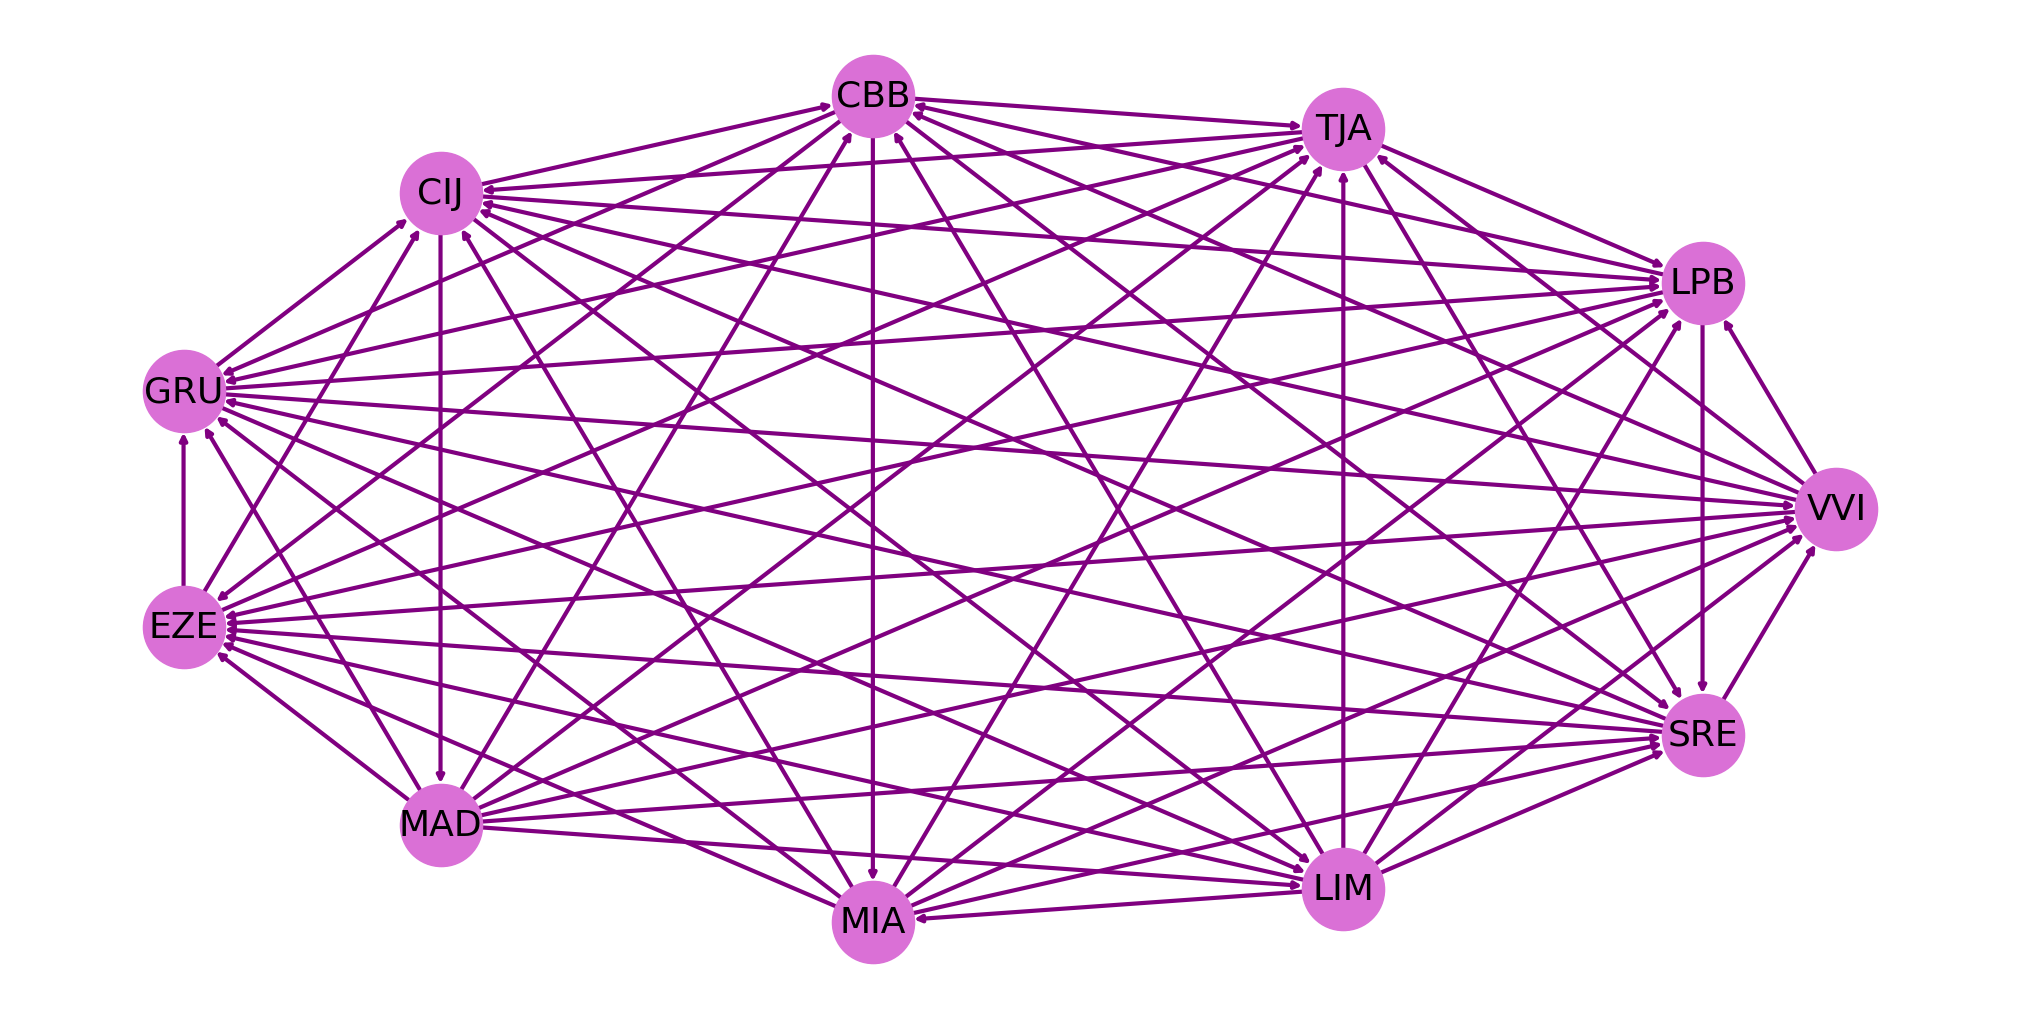

In [50]:
DG=nx.DiGraph()
for row in bolivia_flights.iterrows():
    DG.add_edge(row[1]["origin"],
                row[1]["destino"],
                tiempo=row[1]["tiempo"],
                precio=row[1]["precio"])
DG.nodes(data=True)
#interface_de_grafos
nx.draw_circular(DG,
                 node_color="orchid",
                 edge_color="purple",
                 font_size=26,
                 width=3, with_labels=True, node_size=3500,)

    

In [51]:
#Operacion_de_rutas distancia  y precio 
def show_path(path):
    total_precio= 0
    total_tiempo = 0
    for i in range(len(path)-1):
        origin =path[i]
        destino=path[i+1]
        tiempo = DG[origin][destino]["tiempo"]
        precio = DG[origin][destino]["precio"]
        
        total_precio = total_precio+precio
        total_tiempo = total_tiempo+tiempo
        
        print("    %s -> %s\n    - Tiempo: %s Precio: %s Bs" % (
            iata_bolivia.loc[origin]["nombre_del_aeropuerto"],
            iata_bolivia.loc[destino]["nombre_del_aeropuerto"],
            tiempo, precio)
        )
    
    print("\n     Total Tiempo: %s min Total Precio: %s Bs \n" % (
            total_tiempo, total_precio)
    )

In [52]:
#Todos los caminos más cortos
def get_all_shortest_paths(DiGraph, origin, destino):
    print("*** All shortest paths - Origen: %s Destino: %s" % (
        origin, destino
    ))
    for weight in [ "tiempo", "precio"]:
        print("* Ordenando por: %s" % weight)
        paths = list(nx.all_shortest_paths(DiGraph,
                                          source=origin,
                                          target=destino,
                                          weight=weight))
        for path in paths:
            print("   Camino óptimo: %s" % path)
            show_path(path)
    

In [53]:
#interface_grafos_trazar el camino más corto
def plot_shortest_path(path):
    print(path)
    positions = nx.circular_layout(DG)
    
    nx.draw(DG, pos=positions,
                node_color='dodgerblue',
                edge_color='turquoise',
                font_size=24,
                width=1, with_labels=True, node_size=3500, alpha=0.8
           )
    
    short_path=nx.DiGraph()
    for i in range(len(path)-1):
        short_path.add_edge(path[i], path[i+1])
    
    nx.draw(short_path, pos=positions,
                node_color='dodgerblue',
                edge_color='fuchsia',
                font_size=24,
                width=3, with_labels=True, node_size=3000
           )
    plt.show()

    

In [54]:
#operacion de sumas de rutas alternativas y precio + parte grafica
#obtener el camino más corto
def get_shortest_path(DiGraph, origen, destino):
    print("*** Origen: %s Destino: %s" % (origen, destino))
    
    for weight in ["tiempo", "precio"]:
        print(" Ordenado por: %s" % weight)
        path = list(nx.astar_path(DiGraph,
                                  (origen),
                                  (destino),
                                  weight=weight
                                 ))
        print("   Camino óptimo: %s " % path)
        show_path(path)
        plot_shortest_path(path)
    

<h1><p style="color:orchid";>En caso de viajar y conocer 5 paises +1 vuelo de regreso</p></h1>
<h1><p style="color:purple";>Datos de tiempo y costo</p></h1>

    Aeropuerto Viru Viru -> Aeropuerto El Alto
    - Tiempo: 65 Precio: 246.0 Bs
    Aeropuerto El Alto -> Aeropuerto Buenos Aires Ezeiza
    - Tiempo: 940 Precio: 3152.48 Bs
    Aeropuerto Buenos Aires Ezeiza -> Aeropuerto de Sao Paulo Guarulhos
    - Tiempo: 560 Precio: 3120.69 Bs
    Aeropuerto de Sao Paulo Guarulhos -> Aeropuerto Jorge Chavez
    - Tiempo: 380 Precio: 2245.85 Bs
    Aeropuerto Jorge Chavez -> Aeropuerto Viru Viru
    - Tiempo: 210 Precio: 1417.23 Bs

     Total Tiempo: 2155 min Total Precio: 10182.25 Bs 

['VVI', 'LPB', 'EZE', 'GRU', 'LIM', 'VVI']


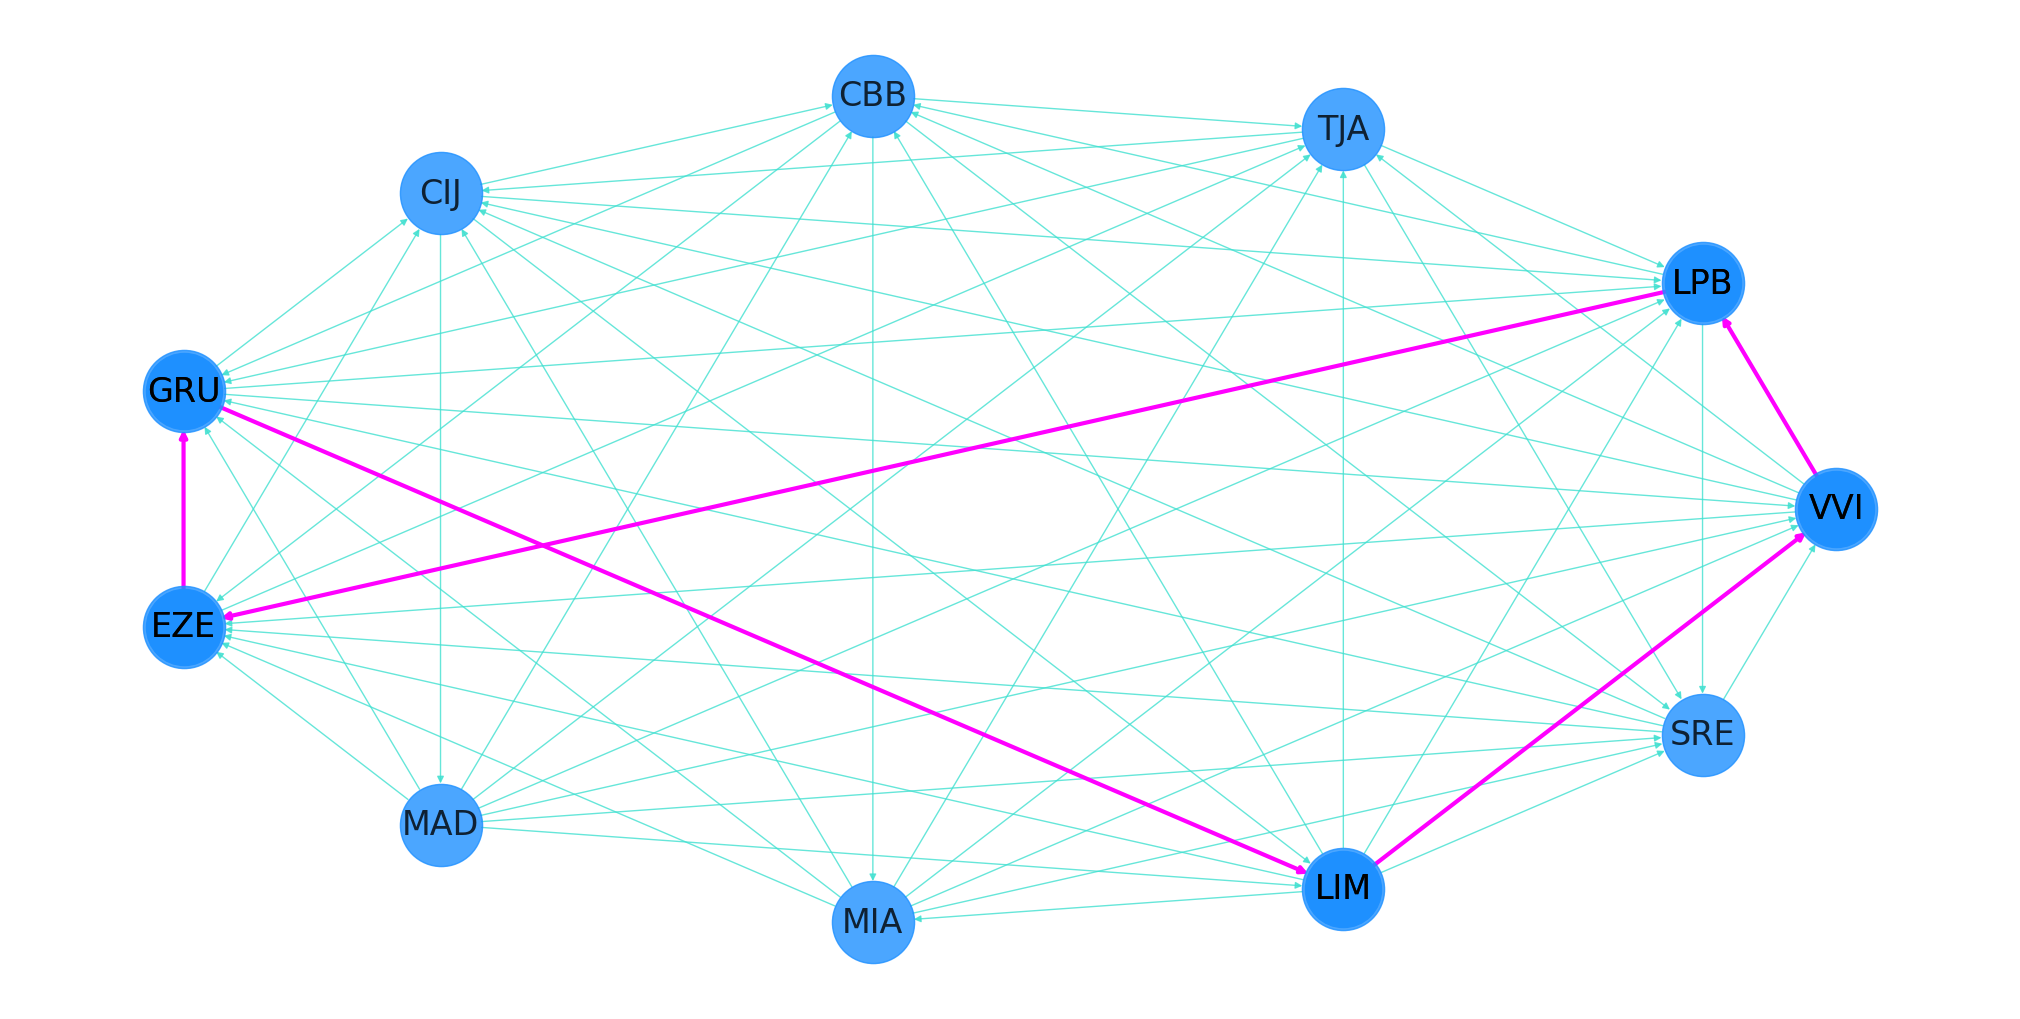

In [55]:
#distanciayprecio
show_path(['VVI','LPB','EZE','GRU','LIM','VVI'])
path = ['VVI','LPB','EZE','GRU','LIM','VVI']
plot_shortest_path (path)

    Aerpuerto Capitan Oriel Lea Plaza -> Aeropuerto Capitan Anibal Arab
    - Tiempo: 865 Precio: 826.0 Bs
    Aeropuerto Capitan Anibal Arab -> Aeropuerto Adolfo Suárez Madrid Barajas
    - Tiempo: 1170 Precio: 5456.38 Bs
    Aeropuerto Adolfo Suárez Madrid Barajas -> Aeropuerto Jorge Chavez
    - Tiempo: 1710 Precio: 4503.45 Bs
    Aeropuerto Jorge Chavez -> Aerpuerto Capitan Oriel Lea Plaza
    - Tiempo: 535 Precio: 1180.21 Bs
    Aerpuerto Capitan Oriel Lea Plaza -> Aeropuerto El Alto
    - Tiempo: 70 Precio: 503.0 Bs
    Aeropuerto El Alto -> Aeropuerto Buenos Aires Ezeiza
    - Tiempo: 940 Precio: 3152.48 Bs
    Aeropuerto Buenos Aires Ezeiza -> Aeropuerto de Sao Paulo Guarulhos
    - Tiempo: 560 Precio: 3120.69 Bs
    Aeropuerto de Sao Paulo Guarulhos -> Aeropuerto Viru Viru
    - Tiempo: 110 Precio: 1416.61 Bs

     Total Tiempo: 5960 min Total Precio: 20158.82 Bs 

['TJA', 'CIJ', 'MAD', 'LIM', 'TJA', 'LPB', 'EZE', 'GRU', 'VVI']


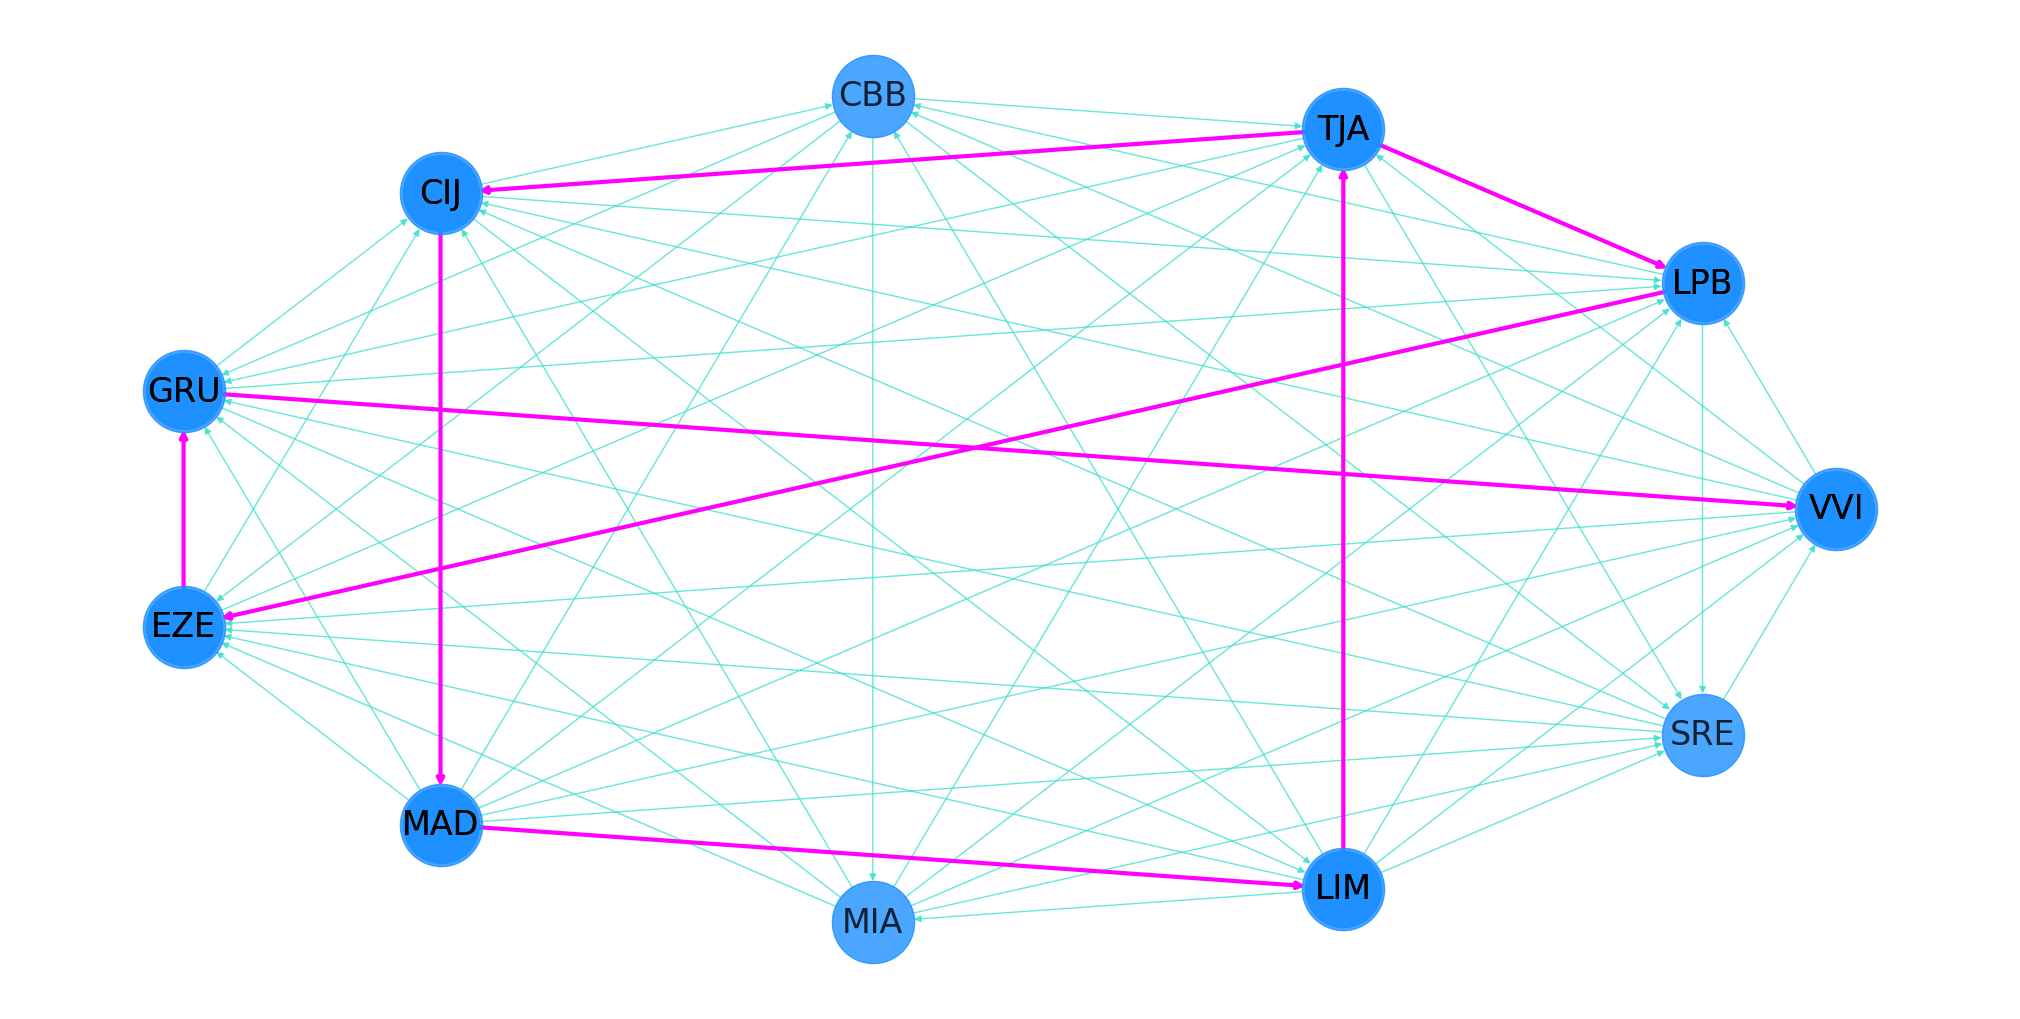

In [91]:
show_path(['TJA','CIJ','MAD','LIM','TJA','LPB','EZE','GRU','VVI'])
path = ['TJA','CIJ','MAD','LIM','TJA','LPB','EZE','GRU','VVI']
plot_shortest_path (path)

<h1><p style="color:orchid";>ORIGEN-->DESTINO (TIEMPO Y COSTO)</P></h1><h1><p style="color:pink";>+GRAFICO</P></h1>


*** Origen: VVI Destino: MAD
 Ordenado por: tiempo
   Camino óptimo: ['VVI', 'CIJ', 'MAD'] 
    Aeropuerto Viru Viru -> Aeropuerto Capitan Anibal Arab
    - Tiempo: 100 Precio: 648.0 Bs
    Aeropuerto Capitan Anibal Arab -> Aeropuerto Adolfo Suárez Madrid Barajas
    - Tiempo: 1170 Precio: 5456.38 Bs

     Total Tiempo: 1270 min Total Precio: 6104.38 Bs 

['VVI', 'CIJ', 'MAD']


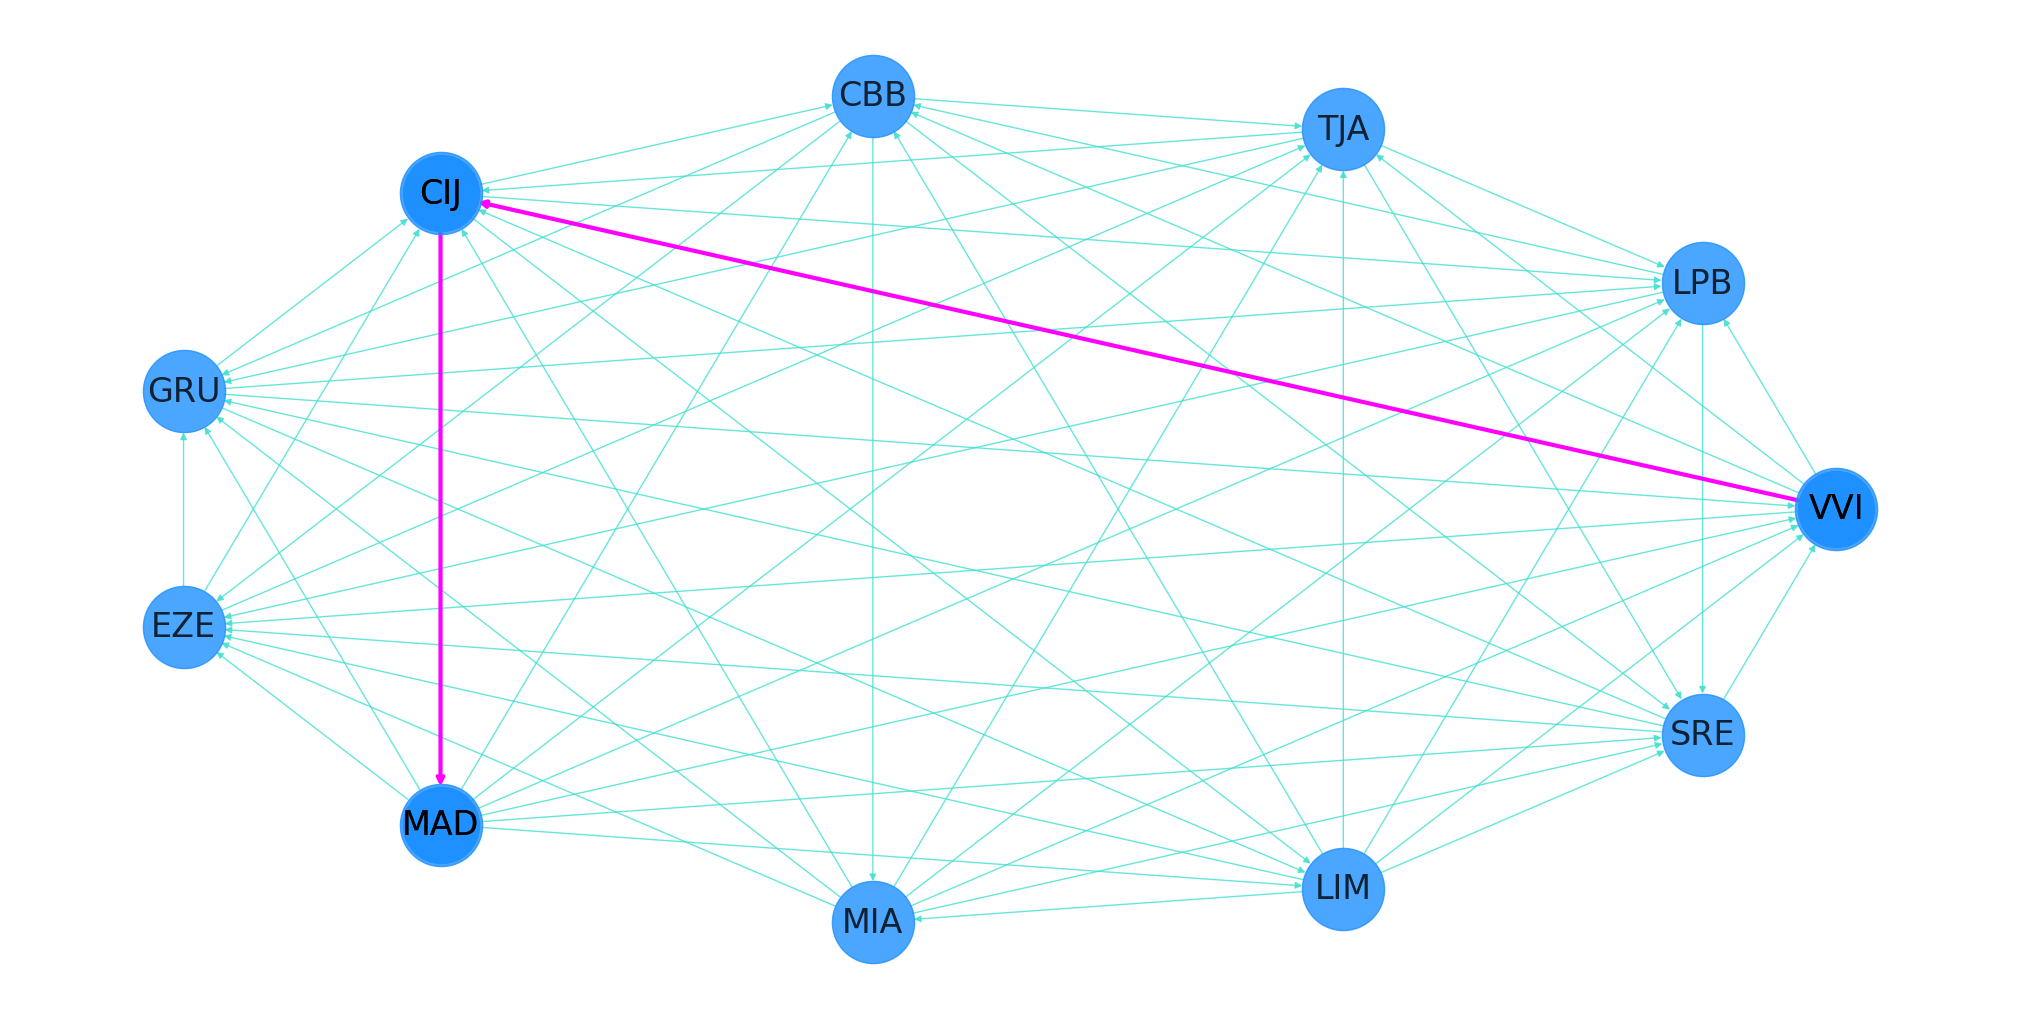

 Ordenado por: precio
   Camino óptimo: ['VVI', 'CIJ', 'MAD'] 
    Aeropuerto Viru Viru -> Aeropuerto Capitan Anibal Arab
    - Tiempo: 100 Precio: 648.0 Bs
    Aeropuerto Capitan Anibal Arab -> Aeropuerto Adolfo Suárez Madrid Barajas
    - Tiempo: 1170 Precio: 5456.38 Bs

     Total Tiempo: 1270 min Total Precio: 6104.38 Bs 

['VVI', 'CIJ', 'MAD']


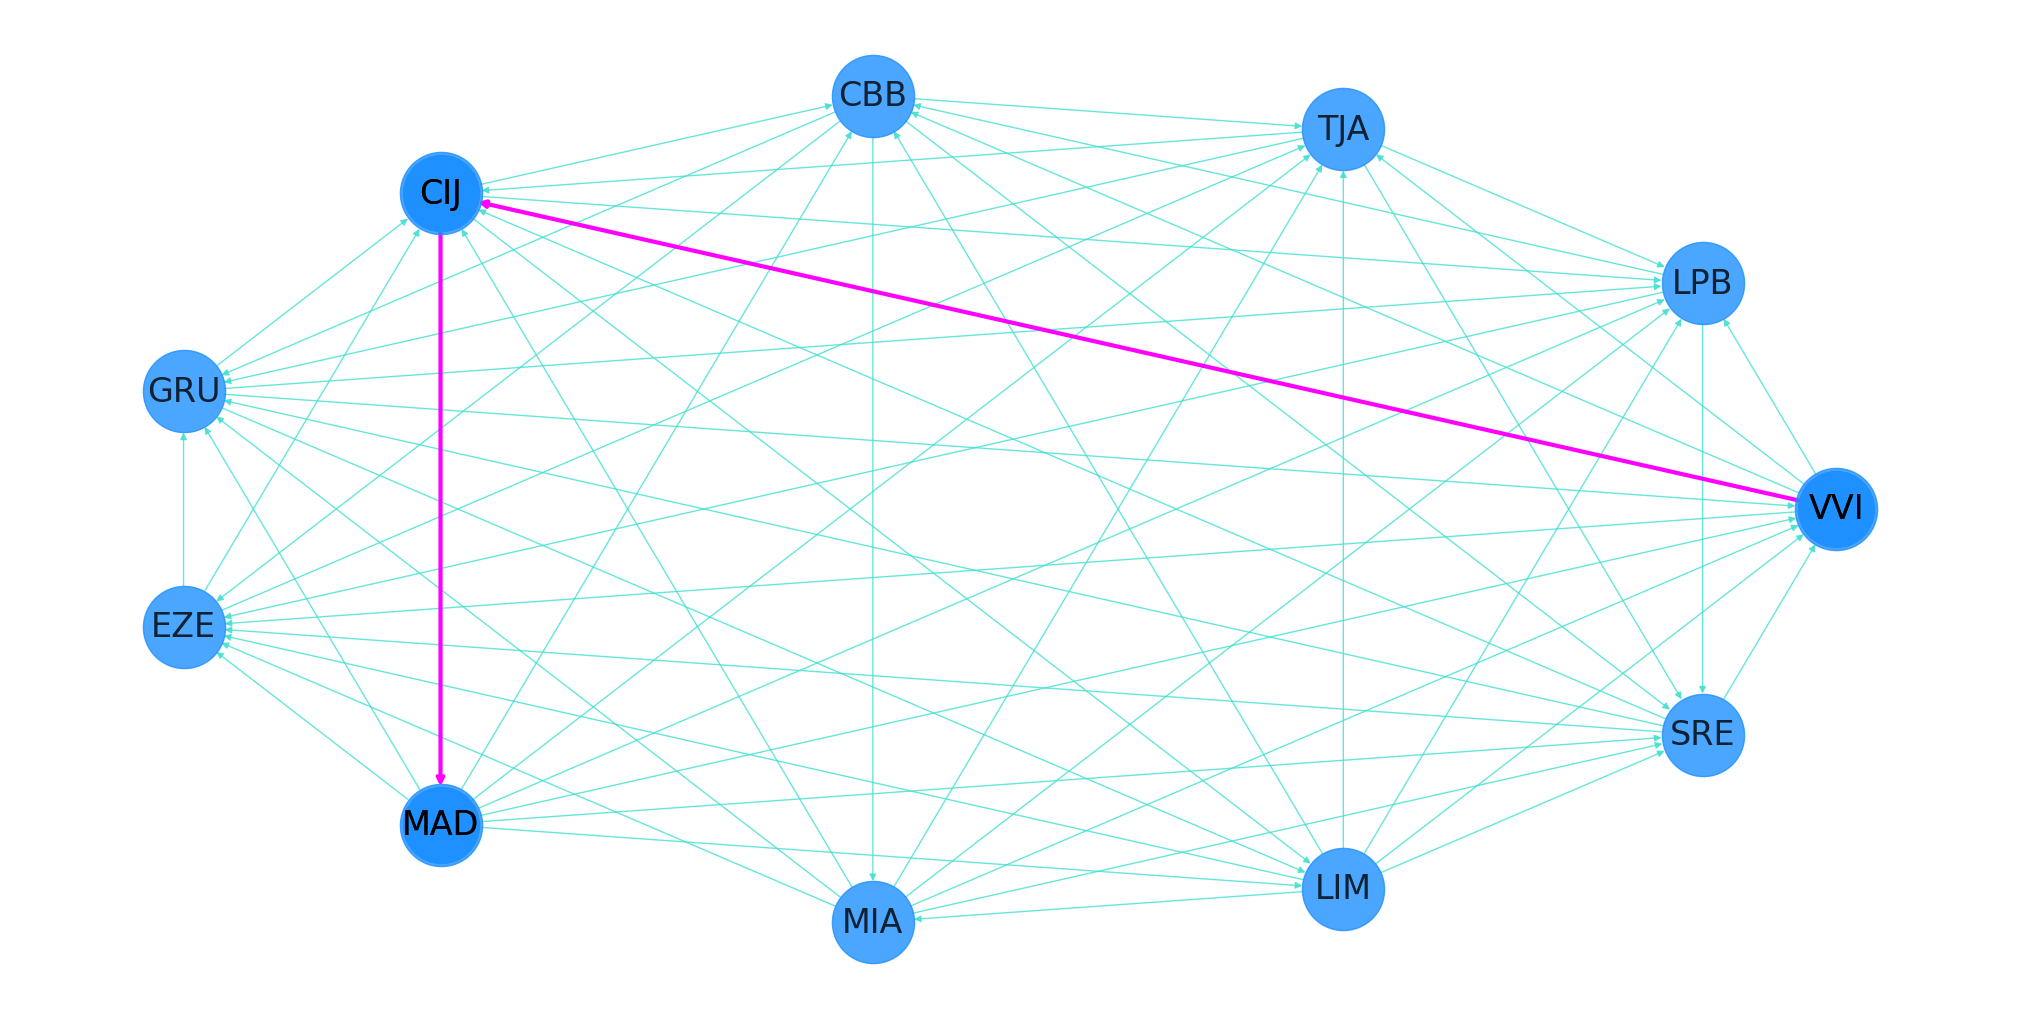

In [92]:
#mostrar el camino más corto , tiempo, precio
get_shortest_path(DG, origen="VVI", destino="MAD")

*** Origen: MAD Destino: CIJ
 Ordenado por: tiempo
   Camino óptimo: ['MAD', 'VVI', 'CIJ'] 
    Aeropuerto Adolfo Suárez Madrid Barajas -> Aeropuerto Viru Viru
    - Tiempo: 930 Precio: 3487.63 Bs
    Aeropuerto Viru Viru -> Aeropuerto Capitan Anibal Arab
    - Tiempo: 100 Precio: 648.0 Bs

     Total Tiempo: 1030 min Total Precio: 4135.63 Bs 

['MAD', 'VVI', 'CIJ']


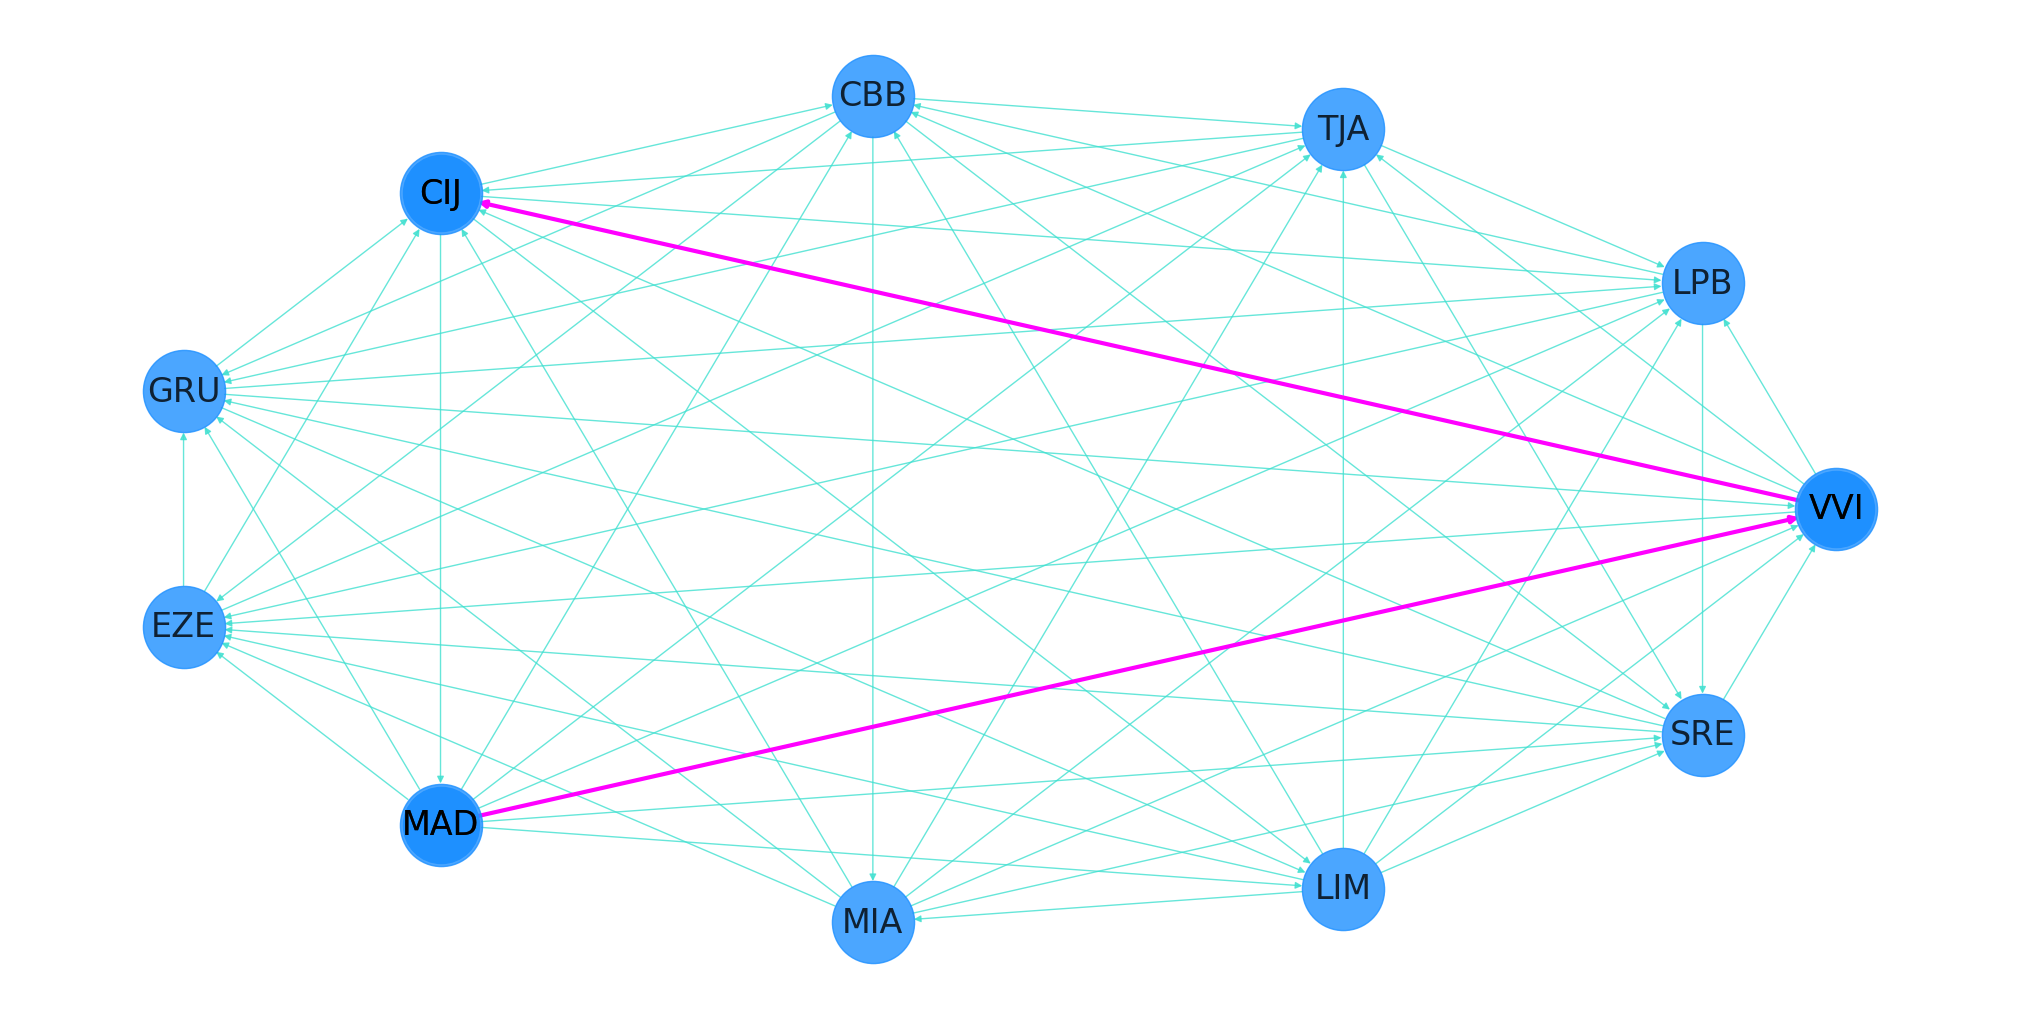

 Ordenado por: precio
   Camino óptimo: ['MAD', 'VVI', 'CIJ'] 
    Aeropuerto Adolfo Suárez Madrid Barajas -> Aeropuerto Viru Viru
    - Tiempo: 930 Precio: 3487.63 Bs
    Aeropuerto Viru Viru -> Aeropuerto Capitan Anibal Arab
    - Tiempo: 100 Precio: 648.0 Bs

     Total Tiempo: 1030 min Total Precio: 4135.63 Bs 

['MAD', 'VVI', 'CIJ']


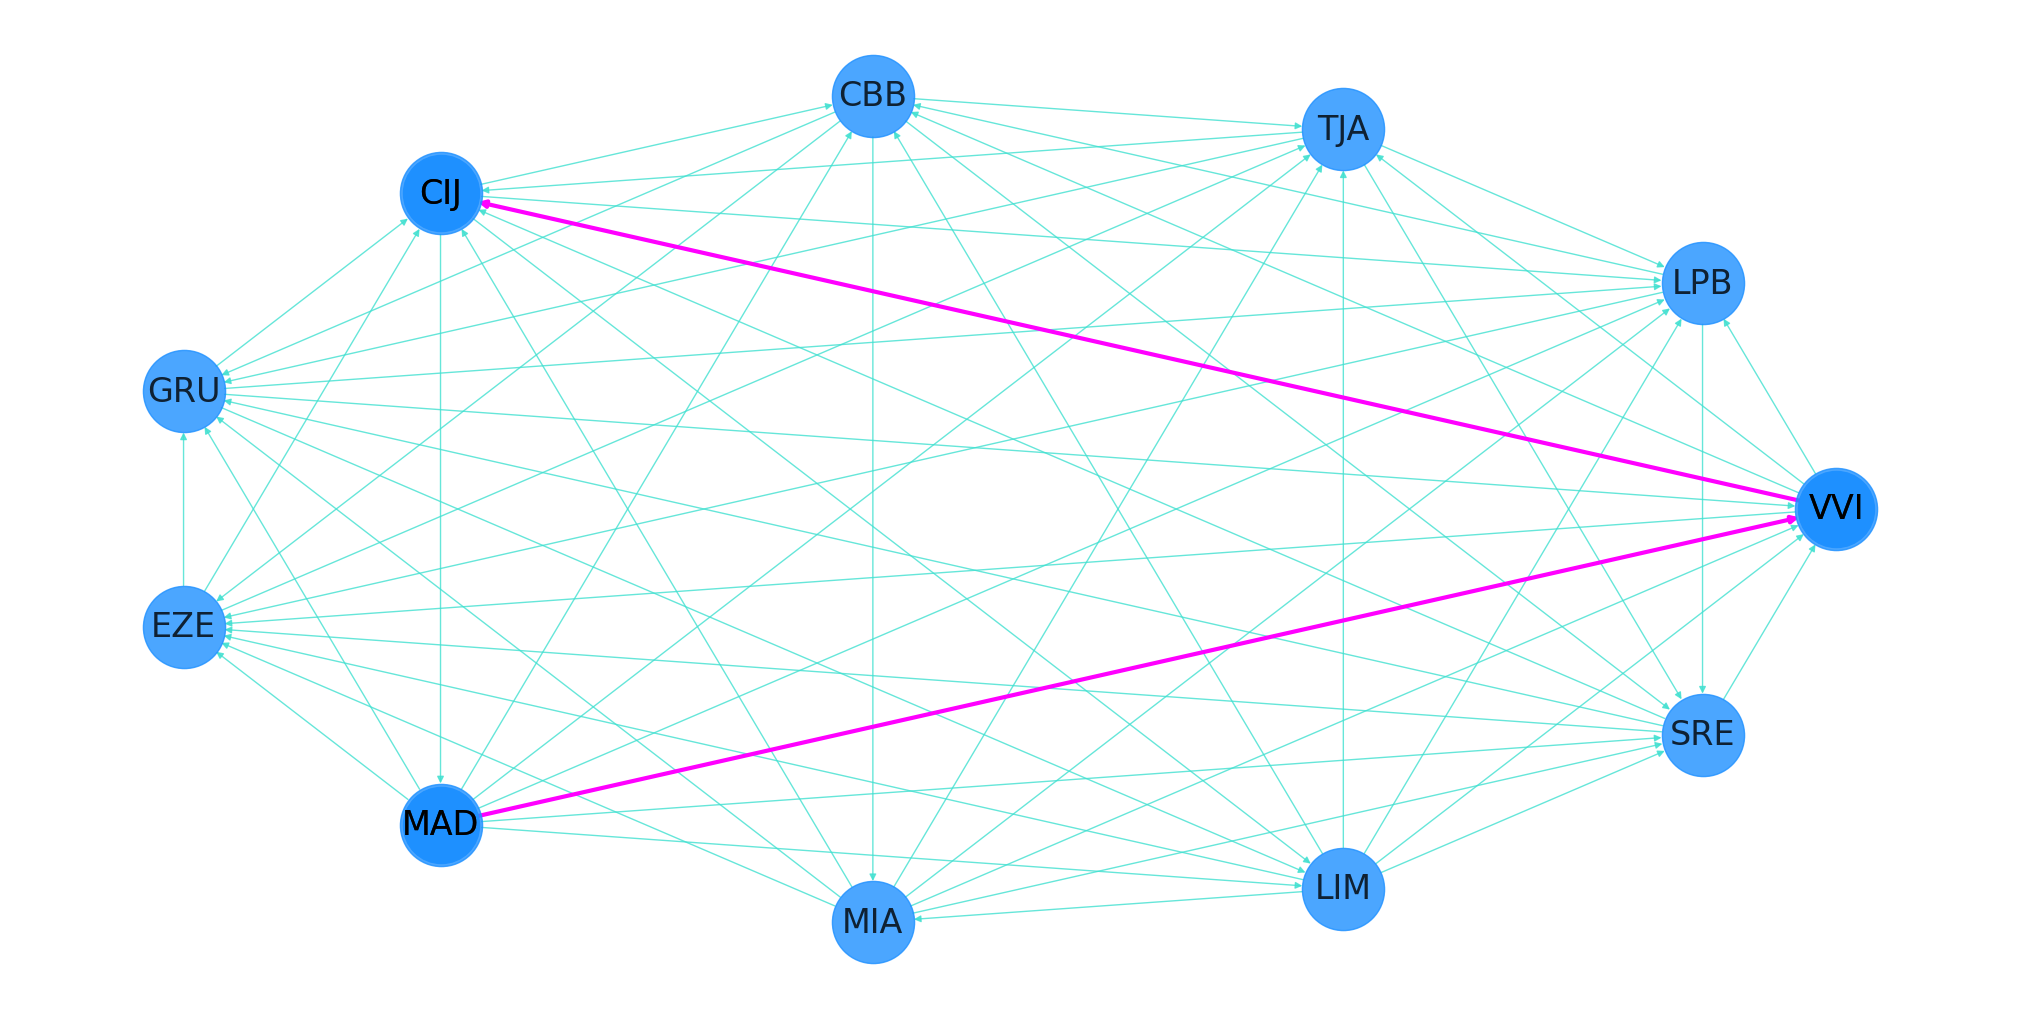

In [93]:
get_shortest_path(DG, origen="MAD", destino="CIJ")